<h1 style="font-family:Patua One;text-align:center;font-size=45px;color:#049AE1;">Machine Learning Laboratory </h1>
<h2 style="font-family:Patua One;text-align:center;font-size=45px;color:#049AE1;">(410302) </h2>
<h3 style="font-family:Bookman Old Style;text-align:center;font-size=35px;color:#03D1EE;">BE Sem I Honors in AI/ML </h3>
<h4 style="font-family:Bookman Old Style;text-align:center;font-size=30px;color:#03D1EE;">Academic Year: 2022-23 </h4>
<h2 style="font-family:Farro;text-align:center;font-size=50px;color:#02DA87;">Lab Assignment No.1  </h2>
<h4 style="font-family:Bookman Old Style;text-align:right;font-size=30px;color:#A6065B;">Name - XYZ </h4>
<h4 style="font-family:Bookman Old Style;text-align:right;font-size=30px;color:#A6065B;">Roll No. - 12345 </h4>
<h4 style="font-family:Bookman Old Style;text-align:right;font-size=30px;color:#A6065B;">Branch - E&TE </h4>
<h4 style="font-family:Bookman Old Style;text-align:right;font-size=30px;color:#A6065B;">College - P.I.C.T </h4>
<br>

<p style="font-family:Footlight MT Light;text-align:left;font-size:1.2em;font-weight:bold;color:#E35E06;">Problem Statement:<br>Write a program to solve a problem using K-Means algorithm in pythonalgorithm.
</p>

<p style="font-family:Footlight MT Light;text-align:left;font-size:1.2em;font-weight:bold;color:#D90571;">Lab Exercise 1:<br>1. Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.<br>2. Figure out if any pre-processing such as scaling would help here.
<br>3. Draw elbow plot and from that figure out optimal value of k.<br><br>
</p>

In [143]:
import warnings
warnings.filterwarnings('ignore')

In [144]:
import pandas as pd

from matplotlib import pyplot as plt

from sklearn.cluster import KMeans

from sklearn.preprocessing import MinMaxScaler

from sklearn.datasets import load_iris

%matplotlib inline


In [145]:
#Loading the dataset
Iris_dataset = load_iris()

In [146]:
df = pd.DataFrame(Iris_dataset.data, columns=Iris_dataset.feature_names)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [147]:
#Dropping unnecessary features

df.drop(['sepal length (cm)', 'sepal width (cm)'], axis='columns', inplace=True)

df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [148]:
km = KMeans(n_clusters=3)

Iris_Clusters = km.fit_predict(df)

#Using fit_predict() to compute cluster centers and predict cluster index for each sample.

Iris_Clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [149]:
df['predicted cluster'] = Iris_Clusters

df.head()

,petal length (cm),petal width (cm),predicted cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


In [150]:
#using MinMaxScaler() for scaling each feature to a given range
scaler = MinMaxScaler()

scaler.fit(df[['petal length (cm)']])

df['petal length (cm)'] = scaler.transform(df[['petal length (cm)']])

scaler.fit(df[['petal width (cm)']])

df['petal width (cm)'] = scaler.transform(df[['petal width (cm)']])

df.head()

,petal length (cm),petal width (cm),predicted cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


In [151]:
df['predicted cluster'].unique()

array([1, 2, 0])

In [152]:
df1 = df[df['predicted cluster']==0]

df2 = df[df['predicted cluster']==1]

df3 = df[df['predicted cluster']==2]

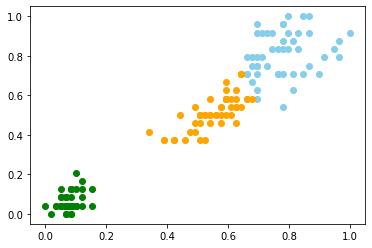

In [153]:
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='skyblue')

plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='green')

plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='orange')

In [154]:
sum_squared_errors = []

k_range = range(1,10)

for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sum_squared_errors.append(km.inertia_)

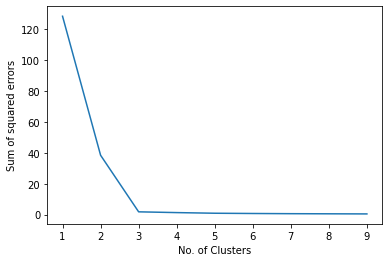

In [155]:
plt.xlabel('No. of Clusters')

plt.ylabel('Sum of squared errors')

plt.plot(k_range,sum_squared_errors)

<br><p style="font-family:Footlight MT Light;text-align:left;font-size:1.2em;font-weight:bold;color:#8E06E3;">Conclusion<br>
We have learnt how the K-means algorithm works and implemented it on iris dataset and discovered about a method of finding the optimal number of clustering - the elbow method. </p>

